# Sensor plotting

Plots a series of sensors

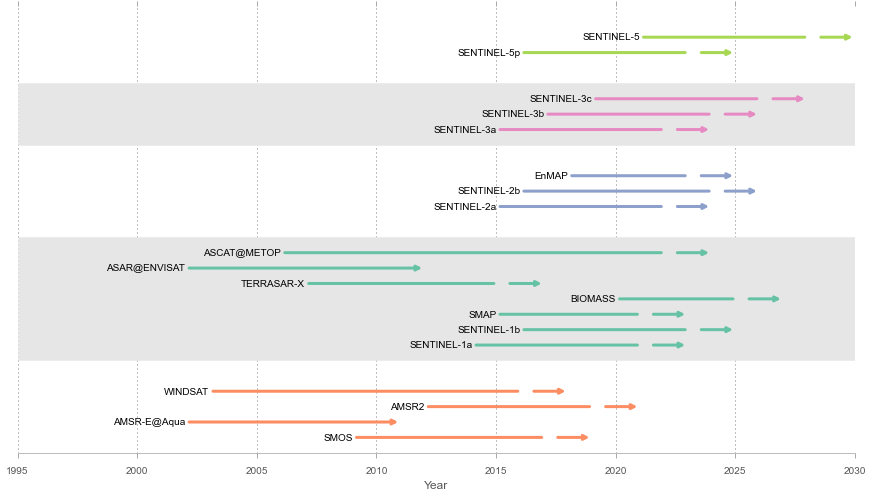

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np

f = plt.figure(figsize=(15.,8.))
ax = f.add_subplot(111)

class Sensor(object):
    def __init__(self, id, start, stop, decomissioned=False):
        """
        start, stop as datetime objects
        """
        self.id = id
        self.start = start
        self.stop = stop
        self.decomissioned = decomissioned
        
    def plot(self, ax, color='black', y=1):
        x1 = self.start.year
        x2 = self.stop.year
        x3 = x2 + 2
        y1 = y * 1.
        y2 = y * 1.
        y3 = y * 1.
        
        if self.decomissioned:
            astyle = "->"
        else:
            astyle = "-"
        res = ax.annotate(self.id,
            xy=(x2, y2), xycoords='data', ha='right', va='center',
            xytext=(x1, y1), textcoords='data',
            arrowprops=dict(arrowstyle=astyle,
                            connectionstyle="arc3", linewidth=3, color=color) )
        
        if not self.decomissioned:
            ax.annotate("", xy=(x3,y3), xycoords='data', va='center', ha='right', textcoords='data', xytext=(x2+0.5,y2),
                    arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", linewidth=3, color=color) )
        
        
colors = ["#FC8D62","#66C2A5","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3"]
others = []
others.append(Sensor('SENTINEL-5p', datetime.datetime(2016,6,15), datetime.datetime(2023,12,31)))      # o.k.   
others.append(Sensor('SENTINEL-5', datetime.datetime(2021,1,1), datetime.datetime(2028,12,31)))  #o.k.

thermal = []
thermal.append(Sensor('SENTINEL-3a', datetime.datetime(2015,11,30), datetime.datetime(2022,12,31))) #o.k.
thermal.append(Sensor('SENTINEL-3b', datetime.datetime(2017,6,1), datetime.datetime(2024,12,31)))  #o.k.
thermal.append(Sensor('SENTINEL-3c', datetime.datetime(2019,1,1), datetime.datetime(2026,12,31)))  #o.k.

optical = []
optical.append(Sensor('SENTINEL-2a', datetime.datetime(2015,6,12), datetime.datetime(2022,12,31)))  # o.k.
optical.append(Sensor('SENTINEL-2b', datetime.datetime(2016,12,31), datetime.datetime(2024,12,31)))  # o.k. 
optical.append(Sensor('EnMAP', datetime.datetime(2018,1,1), datetime.datetime(2023,12,31)))  # o.k. 

mw_a = []
mw_a.append(Sensor('SENTINEL-1a', datetime.datetime(2014,4,3), datetime.datetime(2021,12,31))) # o.k.
mw_a.append(Sensor('SENTINEL-1b', datetime.datetime(2016,3,1), datetime.datetime(2023,12,31))) # o.k.
mw_a.append(Sensor('SMAP', datetime.datetime(2015,1,31), datetime.datetime(2021,12,31)))  # o.k.
mw_a.append(Sensor('BIOMASS', datetime.datetime(2020,1,1), datetime.datetime(2025,12,31)))  # o.k.
mw_a.append(Sensor('TERRASAR-X', datetime.datetime(2007,6,15), datetime.datetime(2015,12,31)))  # o.k.
mw_a.append(Sensor('ASAR@ENVISAT', datetime.datetime(2002,3,1), datetime.datetime(2012,4,8), decomissioned=True))  # o.k.
mw_a.append(Sensor('ASCAT@METOP', datetime.datetime(2006,10,19), datetime.datetime(2022,12,31)))

mw_p = []
mw_p.append(Sensor('SMOS', datetime.datetime(2009,11,2), datetime.datetime(2017,12,31))) # o.k.

mw_p.append(Sensor('AMSR-E@Aqua', datetime.datetime(2002,5,4), datetime.datetime(2011,10,4),decomissioned=True)) # o.k.
mw_p.append(Sensor('AMSR2', datetime.datetime(2012,5,18), datetime.datetime(2019,12,31)))  # o.k.
mw_p.append(Sensor('WINDSAT', datetime.datetime(2003,1,6), datetime.datetime(2016,12,31))) # o.k.


def do_plot(l,ax,color,yoff=1., span=False):
    cnt = 1
    ystart = yoff
    for s in l:
        #print cnt
        s.plot(ax, color=color,y=yoff+cnt)
        
        cnt += 1
        ax.set_xlim(1995,2030)
    yend = yoff + cnt
    if span:
        plt.axhspan ( yoff, yoff + cnt, color="0.9" )
    res = ''
    return cnt+off + 1, res

lines = []
labels = []
off = 0
off, res = do_plot(mw_p,ax,colors[0],yoff=off)
lines.append(res)
labels.append('passive microwave')
off, res = do_plot(mw_a,ax,colors[1],yoff=off, span=True)
lines.append(res)
labels.append('active microwave')
off, res = do_plot(optical,ax,colors[2],yoff=off)
lines.append(res)
labels.append('optical')
off, res = do_plot(thermal,ax,colors[3],yoff=off, span=True)
lines.append(res)
labels.append('thermal')
off, res = do_plot(others,ax,colors[4],yoff=off)
lines.append(res)
labels.append('others')

ax.set_ylim(0,off)
ax.grid()
ax.set_yticks([])
ax.set_xlabel('Year')
#ax.legend(tuple(lines),tuple(labels))
ax.spines['top'].set_visible ( False )
ax.spines['left'].set_visible ( False )
ax.spines['right'].set_visible ( False )


f.savefig('sensors.png', dpi=200)


